### 0. This is my take on "Exploring 67 years of Lego"
*This is my take on the DataCamp <a href=https://www.datacamp.com/projects/10>"Exploring 67 years of Lego"</a> project. I have found that one passage is a bit critical and that some people online often get it wrong, therefore I wanted to show my approach.*

*Plus, I added the Plotly visualizations in addition to the regular Matplotlib used in the project. I think they are much more beautiful and informative.*

## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [25]:
# Import modules
import pandas as pd
import seaborn as sns
import plotly.plotly as py #not in the original
import plotly.graph_objs as go # not in the original


# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [4]:
# How many distinct colors are available?
# -- YOUR CODE FOR TASK 3 --

num_colors = colors.name.nunique()
print(num_colors)

135


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [5]:
# colors_summary: Distribution of colors based on transparency
# -- YOUR CODE FOR TASK 4 --
colors_summary = colors.groupby('is_trans').count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

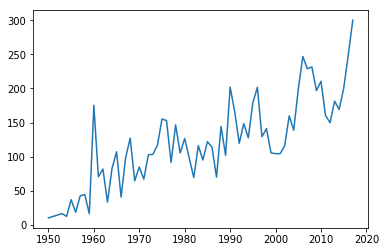

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year').mean()
#parts_by_year.num_parts
# Plot trends in average number of parts by year
plt.plot(parts_by_year.num_parts);


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

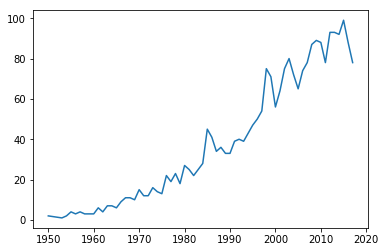

In [5]:
# themes_by_year: Number of themes shipped by year
#themes_by_year = sets.groupby('year').theme_id.nunique()
#themes_by_year.to_frame()
#plt.plot(themes_by_year);

themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index = False).agg({"theme_id": 'nunique'}) #ok 'nunique' is the trick here
# many people have resorted to some weird methods, but now .agg supports 'nunique', and it is crucial that we use it
# I have seen people using 'count'... that's plain wrong, it is a completely different number that we'd be calculating.
# the solution provided is the one that more closely resemples the "hint" provided on Datacamp. Hope it helps.
themes_by_year
plt.plot(themes_by_year['year'], themes_by_year['theme_id']);



In [36]:

trace1 = go.Scatter(
    x = themes_by_year['year'],
    y = themes_by_year['theme_id'],
    mode = 'lines+markers',
    name = 'lines+markers'
)

layout = dict(title = 'Lego Themes Available Over the years',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Lego Themes'),
              )

fig = dict(data = [trace1], layout=layout)


py.iplot(fig, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MarcoDeFalco/0 or inside your plot.ly account where it is named 'basic-scatter'


In [45]:
#This is where I add the Plotly exquivalent of the graph just above: more code but also much more informative.

plotly.tools.set_credentials_file(username='MarcoDeFalco', api_key='rUxuhLSM2xzQYOLmCLfE')


trace1 = go.Scatter(
    x = themes_by_year['year'], #Note that Plotly needs an x (so you should use a DF).. at least as far as I know
    y = parts_by_year['num_parts'], 
    mode = 'lines+markers',
    name = 'lines+markers'
)

layout = dict(title = 'Avg number of parts per set over the years',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Parts'),
              )

fig = dict(data = [trace1], layout=layout)


py.iplot(fig, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MarcoDeFalco/0 or inside your plot.ly account where it is named 'basic-scatter'


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

*I think there are many more questions we can ask.*

*How have themes survived across time? which themes were the most longeve? And how was the production distributed along the years? (e.g. more sets in 2001 less in 2008)*

*Which theme on average, has seen the higest number of sets produced in a single year?*

*Maybe I will keep on working on these questions in the future.*